# Dataset Preparation

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

* loading the IMdB dataset on Tensorflow

In [2]:
# Parameters
vocab_size = 20000  # Number of words to consider as features
max_length = 400    # Maximum length of review (in words)

In [3]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

* Preprocess the ImdB Dataset

In [4]:
import numpy as np

# # Check the length of all sequences in the training and testing datasets
train_lengths = [len(sample) for sample in train_data]
test_lengths = [len(sample) for sample in test_data]

# Print statistics about the sequence lengths
print(f"Training sample - Max length: {np.max(train_lengths)}, Min length: {np.min(train_lengths)}, Average length: {np.mean(train_lengths)}")
print(f"Testing sample - Max length: {np.max(test_lengths)}, Min length: {np.min(test_lengths)}, Average length: {np.mean(test_lengths)}")


Training sample - Max length: 2494, Min length: 11, Average length: 238.71364
Testing sample - Max length: 2315, Min length: 7, Average length: 230.8042


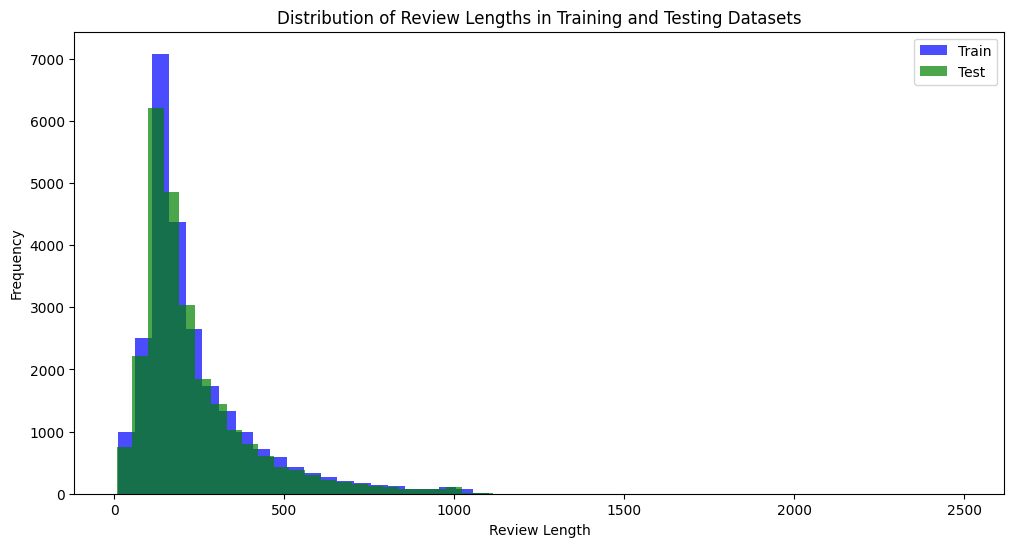

In [5]:
import matplotlib.pyplot as plt

train_lengths = [len(seq) for seq in train_data]
test_lengths = [len(seq) for seq in test_data]

# Plot the distribution of review lengths in both datasets
plt.figure(figsize=(12, 6))
plt.hist(train_lengths, bins=50, color='blue', alpha=0.7, label='Train')

# Plot testing data
plt.hist(test_lengths, bins=50, color='green', alpha=0.7, label='Test')

# Labeling the plot
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths in Training and Testing Datasets')
plt.legend()
plt.show()

* Pad the sequences to ensure uniform input length

In [6]:
train_data = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

In [7]:
# Show the tokenized and padded data
print(f'Example padded review: {train_data[0]}')
print(f'Example label: {train_labels[0]}')

Example padded review: [    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670     2     9    35   480   284     5   150     4   172   112
   167     2   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18 19193     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4     2     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    13   1

In [8]:
# Check the shapes of the preprocessed data
print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')

Training data shape: (25000, 400)
Testing data shape: (25000, 400)


# Building the RNN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Flatten, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [10]:
# Parameters
embedding_dim = 128
rnn_units = 64
learning_rate = 0.001

In [11]:
# Building the RNN Model with GRU
def build_rnn_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        Bidirectional(GRU(units=rnn_units, return_sequences=False)),
        Dropout(rate=0.5),
        Dense(units=32, activation='relu'),
        Dropout(rate=0.5),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

rnn_model = build_rnn_model()
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               74496     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

# Training the Model

In [12]:
# Split the dataset into training and validation sets.  20% of the training data is used for validation.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [18]:
# Train the model
rnn_history = rnn_model.fit(X_train, 
                            y_train, 
                            epochs=10, 
                            batch_size=64, 
                            validation_data=(X_val, y_val), 
                            callbacks=[early_stopping])

Epoch 1/10
313/313 [==============================] - 192s 614ms/step - loss: 0.0766 - accuracy: 0.9768 - val_loss: 0.6867 - val_accuracy: 0.8536
Epoch 2/10
313/313 [==============================] - 195s 622ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.6010 - val_accuracy: 0.8478
Epoch 3/10
313/313 [==============================] - 217s 694ms/step - loss: 0.0350 - accuracy: 0.9905 - val_loss: 0.6895 - val_accuracy: 0.8466
Epoch 4/10
313/313 [==============================] - 249s 795ms/step - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.8421 - val_accuracy: 0.8588
Epoch 5/10
313/313 [==============================] - 220s 701ms/step - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.8116 - val_accuracy: 0.8492


training accuracy steadily improves, reaching nearly 99%, while the training loss decreases significantly, suggesting that the model is learning the training data very well

In [19]:
# Evaluate the RNN model on the test set
rnn_val_loss, rnn_val_accuracy = rnn_model.evaluate(X_val, y_val)
print(f'Validation Loss: {rnn_val_loss}')
print(f'Validation Accuracy: {rnn_val_accuracy}')

157/157 [==============================] - 17s 110ms/step - loss: 0.8116 - accuracy: 0.8492
Validation Loss: 0.8116224408149719
Validation Accuracy: 0.8492000102996826


the validation accuracy remains relatively low and fluctuates around 85%, with the validation loss increasing over time.

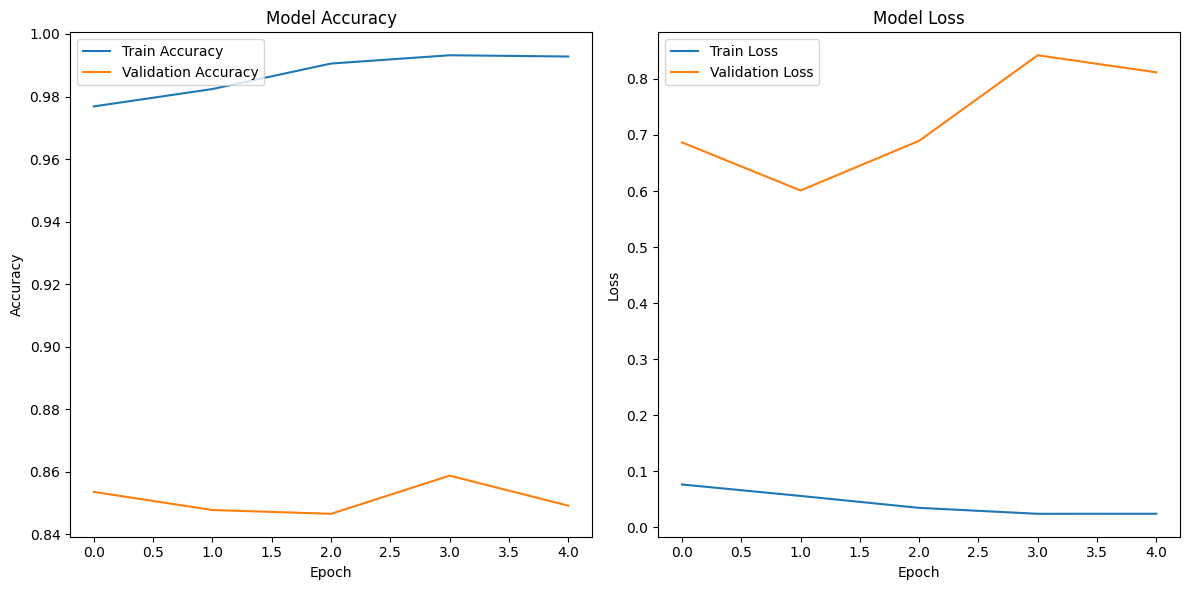

In [20]:
# Plot training and validation loss and accuracy
import matplotlib.pyplot as plt

# Plotting the training history
def plot_history(rnn_history):
    plt.figure(figsize=(12, 6))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
    plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(rnn_history.history['loss'], label='Train Loss')
    plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Call the plot_history function
plot_history(rnn_history)

# Hyperparameter Tuning

In [21]:
# Hyperparameter configurations
hyperparameters = [
    {'rnn_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.005, 'num_layers': 1},
    {'rnn_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_layers': 1},
    {'rnn_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_layers': 1},
    {'rnn_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.0001, 'num_layers': 2},
]

# Function to build the model with given hyperparameters
def build_model(rnn_units, dropout_rate, learning_rate, num_layers):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        GRU(units=rnn_units, return_sequences=False),
        Dropout(rate=dropout_rate),
        Dense(units=64, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform hyperparameter tuning
results = []
for i, params in enumerate(hyperparameters):
    print(f"\nExperiment {i+1} with parameters: {params}")
    model = build_model(**params)
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])
    
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    results.append({'params': params, 'val_loss': val_loss, 'val_accuracy': val_accuracy})


Experiment 1 with parameters: {'rnn_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.005, 'num_layers': 1}
Epoch 1/10
625/625 [==============================] - 143s 224ms/step - loss: 0.6938 - accuracy: 0.5057 - val_loss: 0.6935 - val_accuracy: 0.4924
Epoch 2/10
625/625 [==============================] - 135s 215ms/step - loss: 0.6712 - accuracy: 0.5474 - val_loss: 0.5177 - val_accuracy: 0.7480
Epoch 3/10
625/625 [==============================] - 138s 221ms/step - loss: 0.3677 - accuracy: 0.8477 - val_loss: 0.3442 - val_accuracy: 0.8624
Epoch 4/10
625/625 [==============================] - 138s 221ms/step - loss: 0.2305 - accuracy: 0.9135 - val_loss: 0.3464 - val_accuracy: 0.8602
Epoch 5/10
157/157 [==============================] - 12s 76ms/step - loss: 0.3442 - accuracy: 0.8624

Experiment 2 with parameters: {'rnn_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_layers': 1}
Epoch 1/10
625/625 [==============================] - 274s 434ms/step - loss: 0.6930 - accu

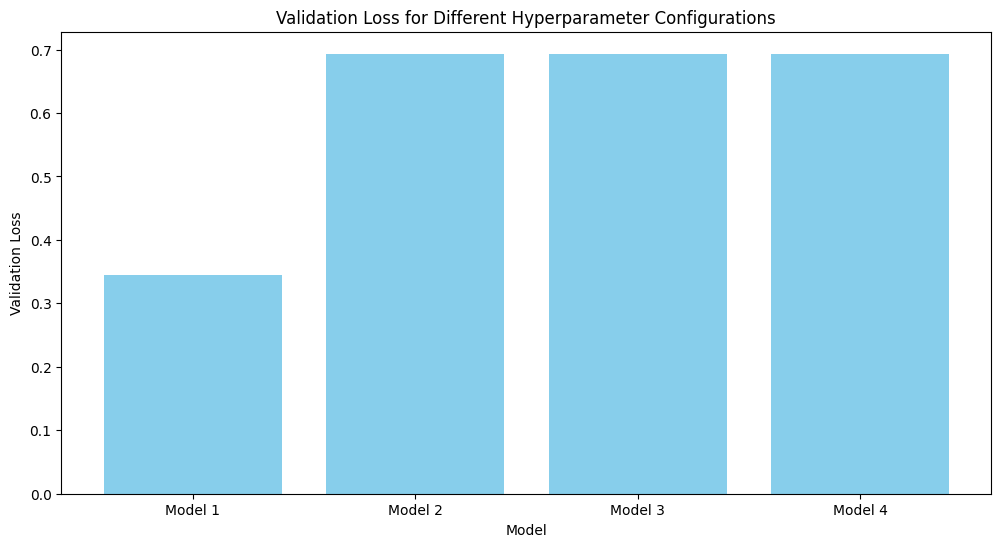

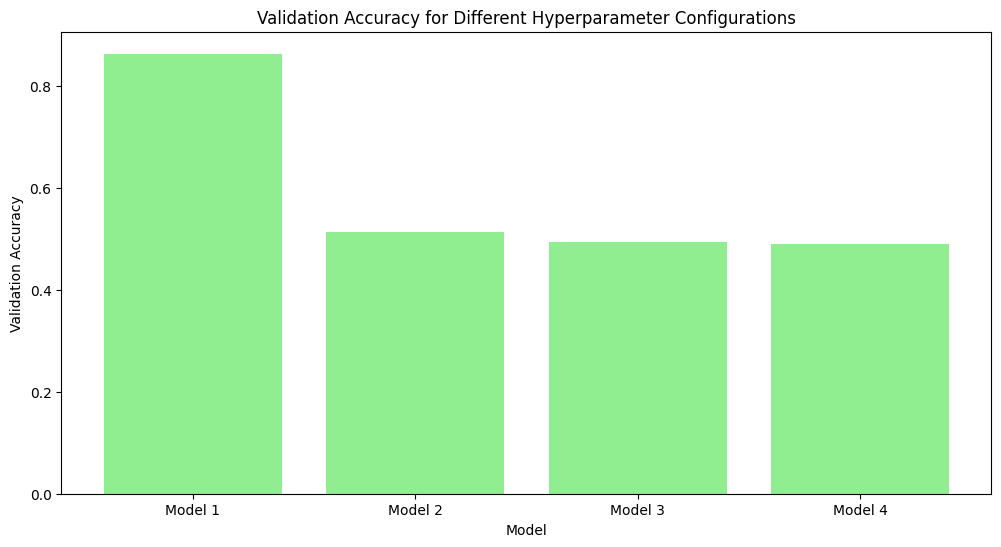

In [22]:
# Plot training and validation loss and accuracy# Plotting function
import matplotlib.pyplot as plt

def plot_results(results):
    # Extract the validation loss and accuracy for each model
    val_losses = [result['val_loss'] for result in results]
    val_accuracies = [result['val_accuracy'] for result in results]
    params = [f"Model {i+1}" for i in range(len(results))]
    
    # Plot Validation Loss
    plt.figure(figsize=(12, 6))
    plt.bar(params, val_losses, color='skyblue')
    plt.title("Validation Loss for Different Hyperparameter Configurations")
    plt.xlabel("Model")
    plt.ylabel("Validation Loss")
    plt.show()
    
    # Plot Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.bar(params, val_accuracies, color='lightgreen')
    plt.title("Validation Accuracy for Different Hyperparameter Configurations")
    plt.xlabel("Model")
    plt.ylabel("Validation Accuracy")
    plt.show()

# Call the function to plot the results
plot_results(results)


The first model, with 64 RNN units, a dropout rate of 0.2, a learning rate of 0.005, and one layer, performs significantly better than the others, achieving the lowest validation loss and highest validation accuracy. This indicates that this configuration strikes the best balance between complexity and regularization. In contrast, the other models, particularly those with higher dropout rates or different learning rates, struggle with higher validation loss and lower accuracy, suggesting they either underfit or overfit the data.

# Comparative Analysis

In [23]:
# Building the Feedforward Neural Network Model
def build_ffnn_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        Flatten(),
        Dense(units=64, activation='relu'),
        Dropout(rate=0.5),
        Dense(units=32, activation='relu'),
        Dropout(rate=0.5),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

ffnn_model = build_ffnn_model()
ffnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 400, 128)          2560000   
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                3276864   
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [24]:
# Train the Feedforward Neural Network Model
ffnn_history = ffnn_model.fit(X_train, y_train,
                              epochs=10,
                              batch_size=32,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping])

# Evaluate the Feedforward Neural Network model on the test set
ffnn_val_loss, ffnn_val_accuracy = ffnn_model.evaluate(X_val, y_val)
print(f'Feedforward NN Validation Loss: {ffnn_val_loss}')
print(f'Feedforward NN Validation Accuracy: {ffnn_val_accuracy}')


Epoch 1/10
625/625 [==============================] - 53s 84ms/step - loss: 0.5272 - accuracy: 0.7113 - val_loss: 0.3383 - val_accuracy: 0.8494
Epoch 2/10
625/625 [==============================] - 49s 78ms/step - loss: 0.1908 - accuracy: 0.9324 - val_loss: 0.3604 - val_accuracy: 0.8512
Epoch 3/10
157/157 [==============================] - 6s 39ms/step - loss: 0.3383 - accuracy: 0.8494
Feedforward NN Validation Loss: 0.33829227089881897
Feedforward NN Validation Accuracy: 0.849399983882904


* Analysis of ffnn

In [26]:
# Comparative Analysis
def comparative_analysis(rnn_val_loss, rnn_val_accuracy, ffnn_val_loss, ffnn_val_accuracy):
    print("\nComparative Analysis of RNN and Feedforward NN:")
    
    print("\nRNN Performance:")
    print(f"Test Loss: {rnn_val_loss}")
    print(f"Test Accuracy: {rnn_val_accuracy}")
    
    print("\nFeedforward NN Performance:")
    print(f"Test Loss: {ffnn_val_loss}")
    print(f"Test Accuracy: {ffnn_val_accuracy}")


comparative_analysis(rnn_val_loss, rnn_val_accuracy, ffnn_val_loss, ffnn_val_accuracy)



Comparative Analysis of RNN and Feedforward NN:

RNN Performance:
Test Loss: 0.8116224408149719
Test Accuracy: 0.8492000102996826

Feedforward NN Performance:
Test Loss: 0.33829227089881897
Test Accuracy: 0.849399983882904


The comparative analysis between the Recurrent Neural Network (RNN) and Feedforward Neural Network (FFNN) reveals that both models achieve similar validation accuracy, with the RNN at 84.92% and the FFNN slightly higher at 84.94%. However, there is a significant difference in their validation losses, with the FFNN demonstrating a much lower loss (0.3383) compared to the RNN (0.8116). This indicates that while both models perform comparably in terms of accuracy, the FFNN is better at minimizing error on the validation data, suggesting it generalizes better and is less prone to overfitting compared to the RNN. These findings highlight the FFNN as the more effective model in this particular scenario.